# Interpolation

Ein übliches Problem der Zeitserien- bzw. Signalanalyse ist der Übergang vom diskreten Signal zu einer kontinuierlichen Beschreibung mittels analytischer Funktionen. Dieser Übergang ist im Allgemeinen notwendig, um Werte geeignet zu interpolieren oder Daten zu filtern. Die sogenannte Interpolierende (oder Interpolante) ist eine stetige Funktion die Werte zwischen diskreten Mess- bzw. Abtastpunkten generiert. Wenn eine theoretische analytische Beschreibung für das Signal nicht existiert,  dann besteht das Interpolationsproblem darin, die Funktion zu bestimmen, die einen optimalen Fit durch die Daten erzeugt.

## Polynominterpolation

https://de.wikipedia.org/wiki/Polynominterpolation

Für $n+1$ gegebene Wertepaare $(x_i,\,f_i)$ mit paarweise verschiedenen Stützstellen $x_i$ wird ein Polynom $P$ maximal $n$-ten Grades gesucht, das alle Gleichungen

$$P(x_i) = f_i, \quad i=0,\dotsc,n$$

erfüllt. 

## Beispiel lineare Interpolation

Gegeben sind zwei Beobachtungen y_1(x_1) und y_2(x_2) an unterschiedlichen Orten $x_1$ und $x_2$. Wir benötigen eine Schätzung der Beobachtungsvariable an einem Ort $r$ 
dazwischen. Ein erster Ansatz ist die lineare Interpolation:

$$y(r)= y_1(x_1)\frac{|x_2-r|}{|x_2-x_1|}+y_2(x_2)\frac{|x_1-r|}{|x_2-x_1|} $$


Populating the interactive namespace from numpy and matplotlib


[0.9, 2.1, 0, 4]

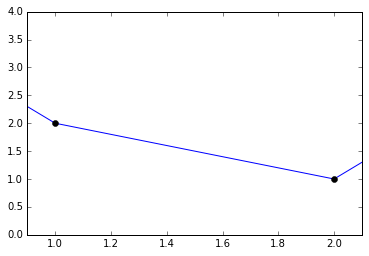

In [43]:
%pylab inline
def linear_interpol(x,y,r):
    y_i=y[0]*abs(x[1]-r)/abs(x[1]-x[0])+y[1]*abs(x[0]-r)/abs(x[1]-x[0])
    return y_i

X=array([1,2])
Y=array([2,1])
r=linspace(0,3,1000)
y_i=linear_interpol(X,Y,r)
plot(r,y_i)
plot(X,Y,'ko')
axis([0.9,2.1,0,4])

## Lagrange-Interpolation

Im Falle von $M$ Datenpunkten kann der Ansatz erweitert werden auf die sogenannte Lagrange-Interpolation mit den Lagrange-Polynomen $l_i$ als Basisfunktionen

$$y(r)=\sum_i^M l_i(r)y_i(x_i)$$

mit 
$$l_i=\prod_{j,i\ne j}^M\frac{r-x_j}{x_i-x_j}$$

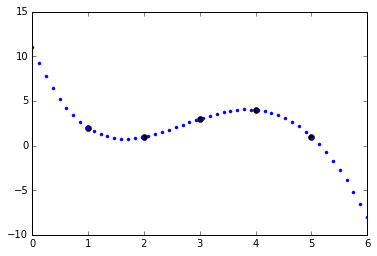

In [42]:
def lagrange_interpolation(r,X,Y):
    M=len(X)
    f=0
    for i in range(M):
        P=[]
        for j in range(M):
            if i!=j:
                P.append((r-X[j])/(X[i]-X[j]))                 
        L=product(array(P))
        f=f+L*Y[i]
    return f


X=array([1,2,3,4,5])
Y=array([2,1,3,4,1])

r=linspace(0,6)
plot(X,Y,'ko')
for ri in r:
    y=lagrange_interpolation(ri,X,Y)
    plot([ri],[y],'b.')


Ein Nachteil der Lagrange-Darstellung ist jedoch, dass alle Basisvektoren bei Hinzunahme einer einzelnen Stützstelle komplett neu berechnet werden müssen, weshalb dieses Verfahren für die meisten praktischen Zwecke zu aufwendig ist.

# Upsampling und FFT-Interpolation

https://de.wikipedia.org/wiki/Upsampling

https://en.wikipedia.org/wiki/Upsampling



## Beispiel: Verdopplung der Abtastrate

Im folgenden Beispiel verdoppeln wir die Abtastrate durch Einfügen von Nullen hinter jedem Messwert. Mit einem nachträglich angewandten Tiefpaßfilter erhalten wir ein interpoliertes Signal.



/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


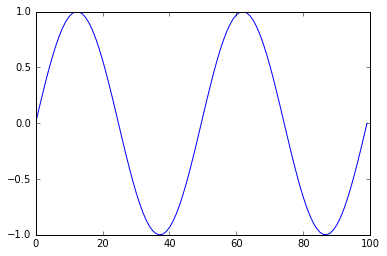

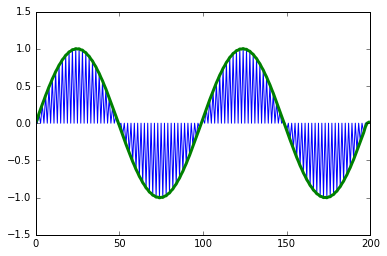

In [76]:
from scipy import signal
from scipy.fftpack import fft, fftshift

numtaps=15
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=True)

#signal.convolve

N=100
m=N*2
x=linspace(0,4*pi,N)
y=sin(x)
Y=zeros(m) 
Y[::2]=y # Jedes zweite Element wird aus Array y übernommen, der Rest bleibt Null
figure()
plot(y)
figure()
plot(Y)

Y_tiefpass=signal.convolve(Y,window,mode='same')
plot(Y_tiefpass*2,'g-',lw=3)

## FFT-Interpolation

Das Einfügen von Nullen kann man auch im Spektrum durchführen. Die Rücktransformation (Inverse FFT) erzeugt ein interpoliertes Signal. Das Einfügen von Nullen wird als "Zero padding" bezeichnet.

http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.irfft.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain

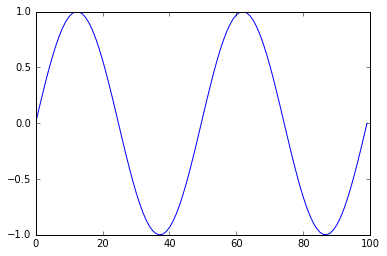

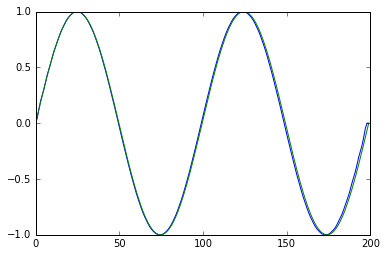

In [51]:
N=100
m=N*2
x=linspace(0,4*pi,N)
a=sin(x)
a=a#+randn(N)*0.3
X=linspace(0,4*pi,m)
A=sin(X)

a_resamp = irfft(rfft(a), m)
figure()
plot(a)
figure()
plot(a_resamp*2)
plot(A)


## Interpolation mit Splines

Splines sind stückweise Polynome und besonders zur Interpolation geeignet. Normale Polynome hoher Ordnung (>5) sind üblicherweise instabil und nicht für die Interpolation von vielen Datenpunkten geeignet. Daher wird die Interpolation stückweise mit Polynomen niedriger Ordnung vorgenommen. An den Datenpunkten, auch Knotenpunkte oder Stützstellen genannt, sollen gewisse Bedingungen (Stetigkeit und Differenzierbarkeit) sichergestellt werden. Daraus ergibt sich eine Berechnungsvorschrift für die Polynom-Koeffizienten.

Eine wichtige Funktionengruppe sind die sogenannten B-Splines (Basis-Splines). Die B-Spline-Zerlegung lautet

$$
s(x)=\sum_{k\in Z} c(k) \beta^n (x-k)
$$
mit den Koeffizienten $c(k)$ und den um $k$-verschobenen B-Splines $\beta^n$ der Ordnung $n$. Die B-Splines ergeben sich aus der rekursiven Faltung eines Rechtecksignals

$$\beta^0(x)=\left\{ \begin{array}{cc}1, & -\frac{1}{2} < x < \frac{1}{2}  \\ \frac{1}{2}, & x=\frac{1}{2}\\ 0, & sonst  \end{array} \right. $$

$$\beta^n(x)=\underbrace{\beta^0*\beta^0*...*\beta^0(x)}_{\times n+1}$$

Die Module scipy.interpolate und scipy.ndimage.interpolate stellen Funktionen bereit, um die Spline-Zerlegung von ein- und mehr-dimensionalen Signalen bzw. Bildern zu berechnen. Es sind zwei Schritte notwendig. Im ersten Schritt wird mit der
Funktion interpolate.splrep die Spline-Repräsentation (Koeffizienten) berechnet. Die Funktion interpolate.splev evaluiert die Koeffizienten an neuen Stützstellen und liefert so den zweiten Schritt für eine Interpolation.


## References

 * Bernd Jähne, Digitale Bildverarbeitung, ZMAW-Bilbliothek, Signatur: DAT-SIG J 2 (4 Exemplare vorhanden)
 * Unser, M. (1999),  Splines: a perfect fit for signal and image processing, IEEE Signal Processing Magazine, http://bigwww.epfl.ch/publications/unser9902.pdf

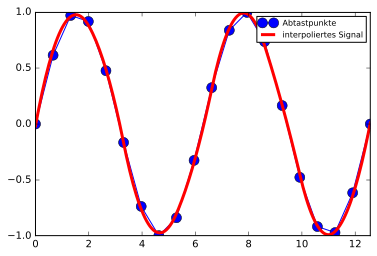

In [101]:
from scipy import interpolate 
N=20
m=200
x=linspace(0,4*pi,N)
a=sin(x)
a=a#+randn(N)*0.3
X=linspace(0,4*pi,m)
A=sin(X)


#Spline Interpolation
tck=interpolate.splrep(x,a,k=2,s=0.01) # Berechne Koeffizienten an den Datenpunkten Ordnung k=2
spline_interp=interpolate.splev(X,tck) # Berechne Spline-Interpolation auf feinem Gitter
figure()
plot(x,a,'bo-',markersize=10,label='Abtastpunkte')
plot(X,spline_interp,'r-',linewidth=3,label='interpoliertes Signal')
#title('n='+str(n)+' w='+str(w))
axis('tight')
legend(loc=1,fontsize=8)
show()

## Beispiel: Datenlücken, irreguläre Abtastung

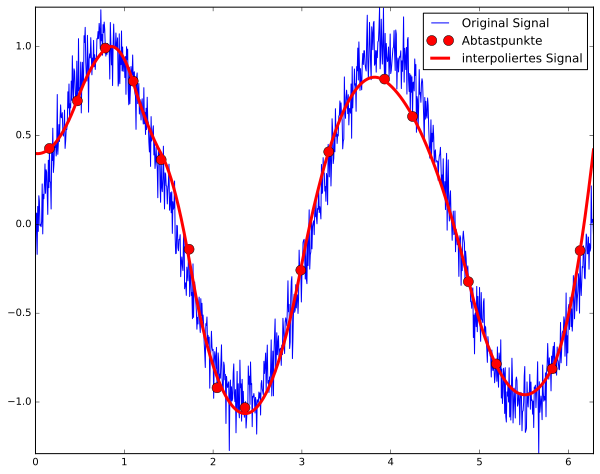

In [100]:

N=1000 # Nahezu kontinuierliche Abtastung mit N Punkten (feines Gitter)
n=20 # Anzahl von Diskreten Datenpunkten mit zufälligen Datenlücken 
w=2 # Anzahl von Sinusschwingungen im Interval

s=N/n# Skalierung

X=linspace(0,w*pi,N)
Y=sin(1*X*w)+randn(N)*0.1

i=arange(0,n)
x=X[(i*s+s/2).astype(int)]
y=Y[(i*s+s/2).astype(int)]

# Zufällige Datenlücken
y[randint(n,size=5)]=nan
index=isfinite(y)
y=y[index]
x=x[index]

#Spline Interpolation
tck=interpolate.splrep(x,y,k=2,s=0.01) # Berechne Koeffizienten an den Datenpunkten Ordnung k=2
spline_interp=interpolate.splev(X,tck) # Berechne Spline-Interpolation auf feinem Gitter
figure(figsize=(10,8))
plot(X,Y,'b-',label='Original Signal')
plot(x,y,'ro',markersize=10,label='Abtastpunkte')
plot(X,spline_interp,'r-',linewidth=3,label='interpoliertes Signal')
axis('tight')
legend()
show()


## Octave Beispiele
### 1D
https://www.gnu.org/software/octave/doc/v4.0.0/One_002ddimensional-Interpolation.html


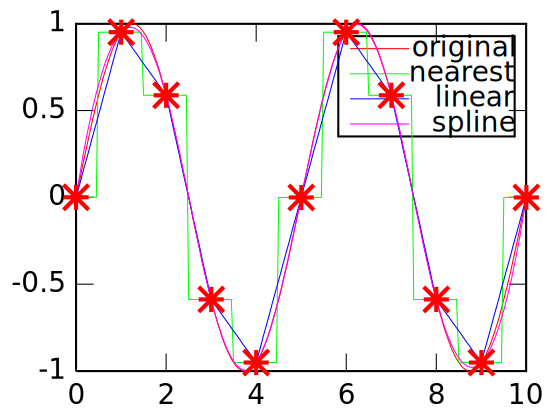

error: invalid value = northeast
error: set: invalid value for radio property "location" (value = northeast)
error: called from:
error:   /usr/share/octave/3.8.1/m/plot/appearance/legend.m at line 995, column 11


In [15]:
xf = [0:0.05:10];
yf = sin (2*pi*xf/5);
xp = [0:10];
yp = sin (2*pi*xp/5);
lin = interp1 (xp, yp, xf);
near = interp1 (xp, yp, xf, "nearest");
spl = interp1 (xp, yp, xf, "spline");
plot (xf,yf,"r", xf,near,"g", xf,lin,"b", xf,spl,"m",xp,yp,"r*");
legend("original", "nearest", "linear", "spline");

### 2D

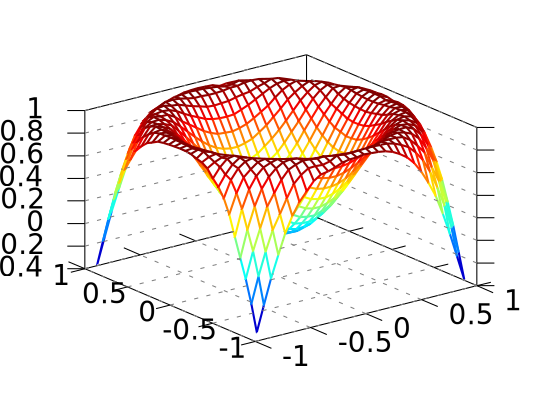

In [7]:
rand ("state", 1);
x = 2*rand (1000,1) - 1;
y = 2*rand (size (x)) - 1;
z = sin (2*(x.^2+y.^2));
[xx,yy] = meshgrid (linspace (-1,1,32));
griddata (x,y,z,xx,yy);
